In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 1. Carregar imagem
img = cv2.imread('img_folha_4.JPG')
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

In [3]:
# 2. Intervalos de cor para áreas saudáveis (verde)
lower_green = np.array([35, 40, 40])
upper_green = np.array([85, 255, 255])
mask_green = cv2.inRange(hsv, lower_green, upper_green)

In [4]:
# 3. Intervalos de cor para áreas danificadas (marrom/amarelo)
lower_brown = np.array([10, 50, 50])
upper_brown = np.array([30, 255, 255])
mask_brown = cv2.inRange(hsv, lower_brown, upper_brown)

In [5]:
# 4. Limpeza morfológica
kernel = np.ones((5, 5), np.uint8)
mask_green = cv2.morphologyEx(mask_green, cv2.MORPH_OPEN, kernel)
mask_brown = cv2.morphologyEx(mask_brown, cv2.MORPH_OPEN, kernel)

In [6]:
# 5. Aplicar máscaras às regiões
healthy_region = cv2.bitwise_and(img, img, mask=mask_green)
damaged_region = cv2.bitwise_and(img, img, mask=mask_brown)

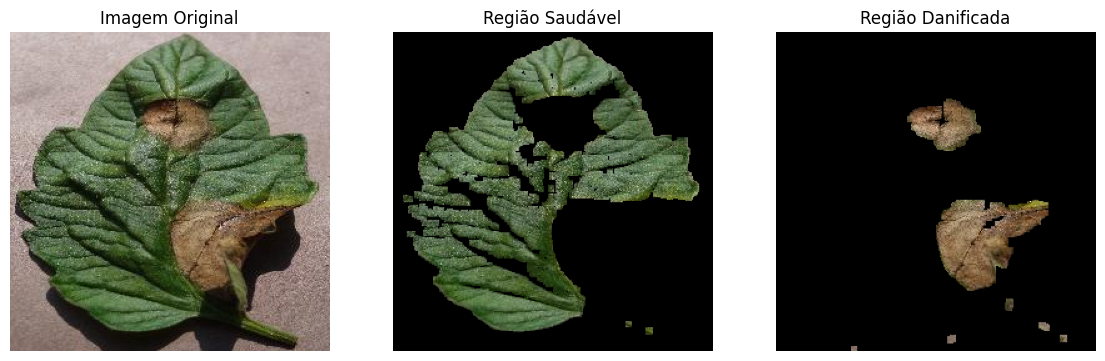

In [7]:
# 6. Exibir os três resultados lado a lado
plt.figure(figsize=(14, 8))

# Imagem original
plt.subplot(1, 3, 1)
plt.title("Imagem Original")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")

# Região saudável
plt.subplot(1, 3, 2)
plt.title("Região Saudável")
plt.imshow(cv2.cvtColor(healthy_region, cv2.COLOR_BGR2RGB))
plt.axis("off")

# Região danificada
plt.subplot(1, 3, 3)
plt.title("Região Danificada")
plt.imshow(cv2.cvtColor(damaged_region, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.show()